In [319]:
import math
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [21]:
print("Question 1")

norm_v = math.sqrt(pow(15,2) + pow(34,2) + pow(18,2) + pow(22,2))
norm_w = math.sqrt(pow(1,2) + pow(3,2) + pow(2,2) + pow(7,2))

print("A) The norm of v equals: " + str(norm_v) + "and the norm of w equals: " + str(norm_w))

dotproduct = 15 * 1 + 34 * 3 + 18 * 2 + 22 * 7

print("B) The dot product of v and w equals: " + str(dotproduct))

distance = math.sqrt(pow((15-1),2) + pow((34-3),2) + pow((18-2),2) + pow((22-7),2))

print("C) The distance between v and w equals: " + str(distance))

x = dotproduct/ pow(norm_w,2)


print("D) The projection of v onto w is: [" +  str(1 * x)  + " " + str(3 * x) + " " + str(2 * x) + " " + str(7 * x) + "]" )

Question 1
A) The norm of v equals: 46.78675026115834and the norm of w equals: 7.937253933193772
B) The dot product of v and w equals: 307
C) The distance between v and w equals: 40.47221268969612
D) The projection of v onto w is: [4.873015873015873 14.619047619047617 9.746031746031745 34.11111111111111]


Question 1
A) The norm of v equals: 46.78675026115834and the norm of w equals: 7.937253933193772
B) The dot product of v and w equals: 307
C) The distance between v and w equals: 40.47221268969612
D) The projection of v onto w is: [4.873015873015873 14.619047619047617 9.746031746031745 34.11111111111111]

In [31]:
print("Question 2")

N = 100
k = 10
n = 50
x = 10

def hypergeometric(N,k,n,x):
    num1 = math.factorial(k)/(math.factorial(x)*math.factorial(k-x))
    num2 = math.factorial(N-k)/(math.factorial(n-x) * math.factorial((N-k)-(n-x)))
    denom = math.factorial(N)/(math.factorial(n) * math.factorial(N-n))
    return num1 * num2 /denom

z = hypergeometric(N,k,n,x)

sum = 0
for i in range(5):
    sum += hypergeometric(N,k,n,i+5)


print("The probability of finding 10 hacker packets out of a sample of 50 is " + str(z) + " and the probability of finding at least half of the hacker packets is " + str(sum))

Question 2
The probability of finding 10 hacker packets out of a sample of 50 is 0.0005934196725858287 and the probability of finding at least half of the hacker packets is 0.6290733534401817


Question 2
The probability of finding 10 hacker packets out of a sample of 50 is 0.0005934196725858287 and the probability of finding at least half of the hacker packets is 0.6290733534401817

In [421]:
print("Question 3")

dat = pd.read_csv(r"C:\Users\camda\OneDrive\VSdataFundamentals\Data-HW2\cardiac.csv")
contingency_table = pd.crosstab(dat['gender'],dat['hxofHT'])
print("A) \n" + str(contingency_table) + '\n')

z1 = hypergeometric(558,393,220,144)
z2 = hypergeometric(558,393,338,249)
print("B) The odds of getting this contingency table are " + str(z1) + "\n")

print("C) The null hypothesis is that men and women have the same chances of suffering from hypertension")

print("D) We can reject the null hypothesis because the p value is " + str(scipy.stats.fisher_exact(contingency_table,'less')[1]))

Question 3
A) 
hxofHT    0   1
gender         
0       144  76
1       249  89

B) The odds of getting this contingency table are 0.008846092806850215

C) The null hypothesis is that men and women have the same chances of suffering from hypertension
D) We can reject the null hypothesis because the p value is 0.024039690892814797


Question 3
A) 
hxofHT    0   1
gender         
0       144  76
1       249  89

B) The odds of getting this contingency table are 0.008846092806850215

C) The null hypothesis is that men and women have the same chances of suffering from hypertension
D) We can reject the null hypothesis because the p value is 0.024039690892814797

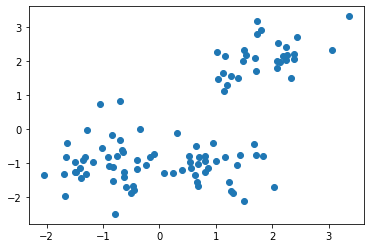

In [167]:
file = open(r"C:\Users\camda\OneDrive\VSdataFundamentals\Data-HW2\2D_data.txt")
dat1 = file.readlines()
file.close()
templistx = []
templisty = []
for i in range(len(dat1)):
    temp=dat1[i].split()
    templistx.append(float(temp[0]))
    templisty.append(float(temp[1]))
dat1 = pd.DataFrame(templistx,columns=['x'])
dat1['y'] = templisty
dat1['labels'] = np.zeros(len(dat1))

plt.scatter(dat1['x'],dat1['y'])

In [253]:


#test = initialize_centers(dat1,2)
def initialize_centers(df, k):
    centers = np.zeros((k, 2))
    for i in range(k):
        temp = np.random.choice(100)
        center = (df['x'][temp],df['y'][temp])
        centers[i] = center
    return centers
z = initialize_centers(dat1,3)

def distance(x1,y1,x2,y2):
    dist = math.sqrt(pow((x1-x2),2) + pow((y1-y2),2))
    return dist



def assign_center(df, centers):
    labels = []
    for i in range(len(df)):
        temp=[]
        for j in range(len(centers)):
            temp.append(distance(df['x'][i],df['y'][i],centers[j][0],centers[j][1]))
        closest_center = temp.index(min(temp))
        df['labels'][i] = closest_center
    return df

dat1 = assign_center(dat1,z)

def update_center(df,centers):
    for i in range(len(centers)):
        centers[i][0] = df.loc[df['labels']==i,'x'].mean()
        centers[i][1] = df.loc[df['labels']==i,'y'].mean()
    return(centers)



def kmeans(df,k):
    df1 = df
    centers = initialize_centers(df1,k)
    for i in range(50):
        df1 = assign_center(df1,centers)
        centers = update_center(df1,centers)
    return df1,centers



def distance_score(df,centers):
    dist_scores = []
    sum = 0
    for j in range(len(centers)):
        temp = df.loc[df['labels'] == j]
        
        for i in range(len(temp)):
            sum += distance(df['x'][i],df['y'][i],centers[j][0],centers[j][1])
        #print(temp['labels'])
        #print(sum)
        dist_scores.append(sum)
    return sum/100




[2.197295375828256, 0.6829246860696004]


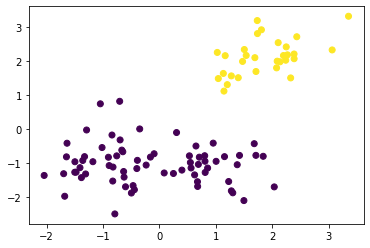

In [186]:
x,y = kmeans(dat1,2)
plt.scatter(x['x'],x['y'],c=x['labels'])

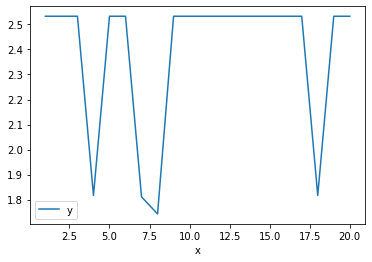

In [257]:
x_value = list(range(1,21))
y_value = []
for i in range(20):
    x,y = kmeans(dat1,3)
    #print(y)
    y_value.append(distance_score(x,y))


df2 = pd.DataFrame(x_value,columns=['x'])
df2['y'] = y_value
plot1 = df2.plot.line(x='x',y='y')




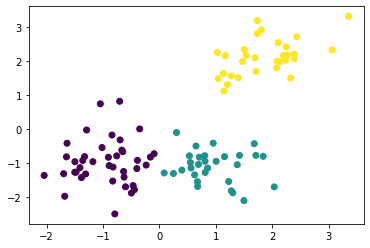

In [187]:
x,y = kmeans(dat1,3)
plt.scatter(x['x'],x['y'],c=x['labels'])



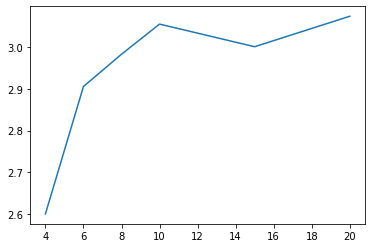

In [263]:
k_list = [4,6,8,10,15,20]
scores = []
for k in k_list:
    x,y = kmeans(dat1,k)
    temp = distance_score(x,y)
    scores.append(temp)
    
plt.plot(k_list,scores)
plt.show()

In [354]:
file = open(r"C:\Users\camda\OneDrive\VSdataFundamentals\Data-HW2\mnist\testx.txt")
testx = file.readlines()
file.close()

file = open(r"C:\Users\camda\OneDrive\VSdataFundamentals\Data-HW2\mnist\trainx.txt")
trainx = file.readlines()
file.close()


testvecs = []
for i in range(len(testx)):
    testx[i] = testx[i].split(',')
    temp = []
    for j in range(len(testx[i])):
        temp.append(float(testx[i][j]))
    testvecs.append(temp)
    
trainvecs = []
for i in range(len(trainx)):
    trainx[i] = trainx[i].split(',')
    temp = []
    for j in range(len(trainx[i])):
        temp.append(float(trainx[i][j]))
    trainvecs.append(temp)
    



In [416]:
def pickcenter(list,k):
    temp = []
    for i in range(k):
        center = np.random.choice(len(list))
        temp.append(list[center])
    return temp

def vectordist(v1,v2):
    dist = 0
    for i in range(len(v1)):
        dist += pow((v1[i]-v2[i]),2)
    return math.sqrt(dist)
        
def assigncenters2(list,centers,labels):      
    for i in range(len(list)):
        temp = []
        for j in range(len(centers)):
            temp.append(vectordist(list[i],centers[j]))
        closest_center = temp.index(min(temp))
        #print(closest_center)
        labels[i] = closest_center
    return labels

def newcenters(list,centers,labels,k):
    count = np.zeros(k)
    #totals = np.zeros(k)
    result = []
    for i in range(len(centers)):
        temp = np.zeros(784)
        for j in range(len(list)):
            if labels[j] == i:
                count[i] += 1
                for l in range(784):
                    temp[l] += list[j][l]
        for q in range(len(temp)):
            temp[q] = temp[q]/count[i]
        result.append(temp)
    return result
        
    

x = pickcenter(trainvecs,2)
labels = np.zeros(len(trainvecs))

z = assigncenters2(trainvecs,x,labels)


#x = newcenters(trainvecs,x,labels,2)

def kmeans2(list,k):
    list2 = list
    centers = pickcenter(list2,k)
    labels = np.zeros(len(list2))
    count = 0
    for i in range(20):
        print(count)
        labels = assigncenters2(list2,centers,labels)
        centers = newcenters(list2,centers,labels,k)
        count += 1
    return centers


#x = np.array(trainvecs[0]).reshape(28,28)
#x.imshow()
#plt.imshow(x)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


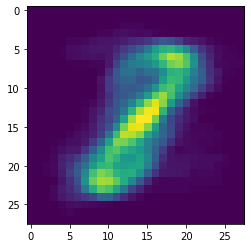

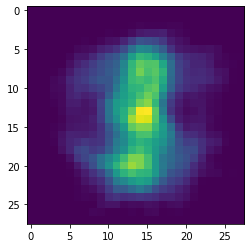

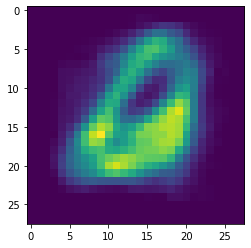

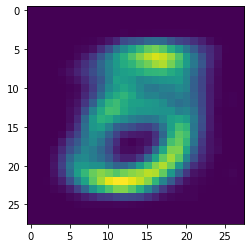

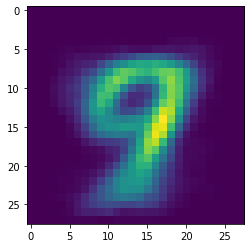

In [417]:
test = kmeans2(trainvecs,5)
temp = []
for i in range(len(test)):
    temp.append(np.array(test[i]))
    
for i in range(len(temp)):
    temp[i] = temp[i].reshape(28,28)
    
for i in range(len(temp)):
    plt.imshow(temp[i])
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


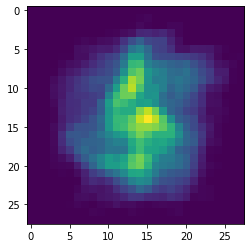

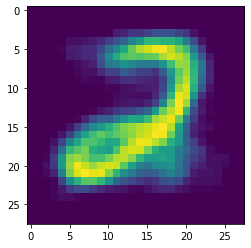

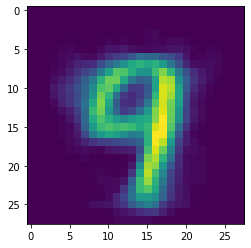

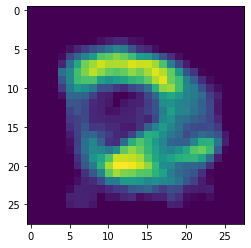

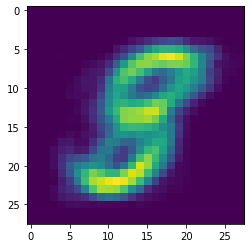

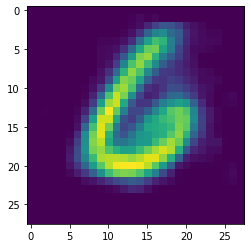

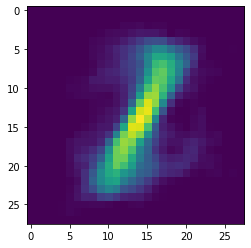

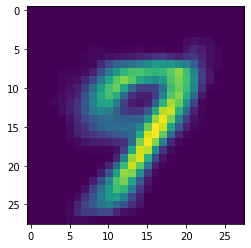

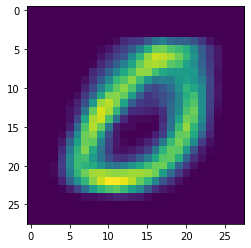

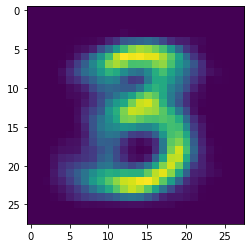

In [418]:
test = kmeans2(trainvecs,10)
temp = []
for i in range(len(test)):
    temp.append(np.array(test[i]))
    
for i in range(len(temp)):
    temp[i] = temp[i].reshape(28,28)
    
for i in range(len(temp)):
    plt.imshow(temp[i])
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


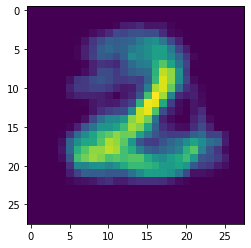

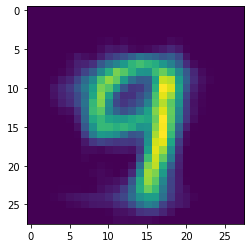

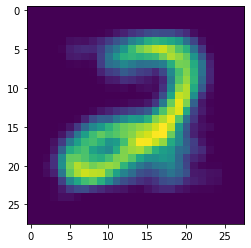

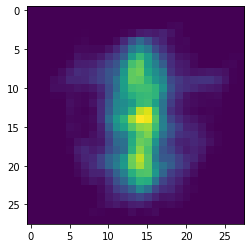

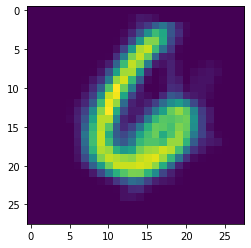

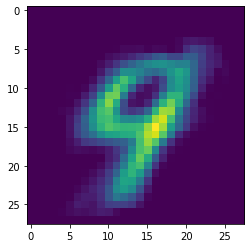

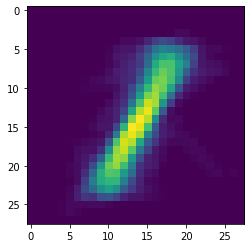

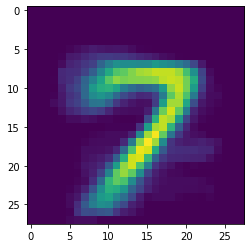

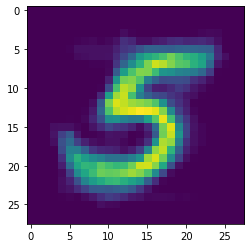

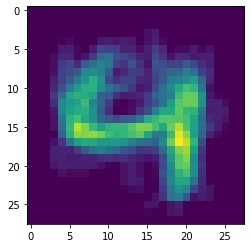

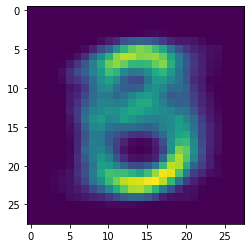

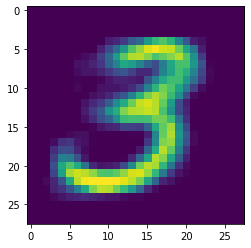

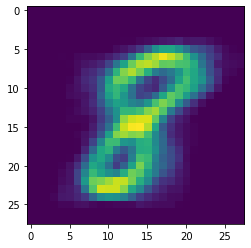

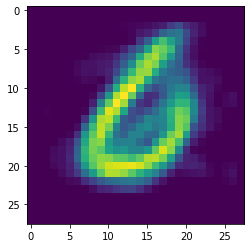

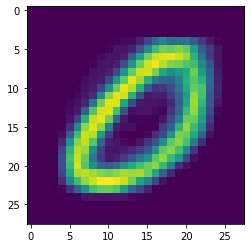

In [419]:
test = kmeans2(trainvecs,15)
temp = []
for i in range(len(test)):
    temp.append(np.array(test[i]))
    
for i in range(len(temp)):
    temp[i] = temp[i].reshape(28,28)
    
for i in range(len(temp)):
    plt.imshow(temp[i])
    plt.show()

I began seeing images of numbers when k equaled 10 when k equaled 15 the numbers were very clear.

Question 5
a) By just copying and pasting the first question in chat gpt messes up some of the math. Specifically it provided norms of 32.49 and 7.94 which are incorrect. It also said that the distance was 43.07. ChatGPT provided the right fromulas but it seems as if it struggles with arithmetic.

b) Once again for question 2 copying and pasting the question in chatgpt will provide wrong answers. It first provided a probability of 0.00007 for catching 10 packets which is too low. It used the right formula but did not do the math correctly. For the 2nd part it provided an answer of 2.6% that at least 5 packets are captured which is way too low. It used the formula incorrectly to achieve this value.

C)